<a href="https://colab.research.google.com/github/EisaacJC/ToLearn/blob/master/GeoVisualizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Visualización de datos geográficos usando MAPBOX y PLOTLY
### Emmanuel Isaac Juárez Caballero

#### Base de datos de antenas que proporcionan servicio de internet gratuito en la ciudad de México

## Importando librerías

In [1]:
import numpy as np #Numpy
import pandas as pd #Pandas- DataFrames
import seaborn as sns #Visualizaciones
import matplotlib as plt #Visualizaciones
import plotly.graph_objects as go # plotly 
from tqdm import tqdm #for animados
import plotly.express as px #express plotly

## Tratamiento inicial de la base de datos

In [2]:
#Importado datos desde la página de CDMX
data=pd.read_csv("https://datos.cdmx.gob.mx/explore/dataset/ubicacion-acceso-gratuito-internet-wifi-c5/download/?format=csv&timezone=America/Mexico_City&lang=es&use_labels_for_header=true&csv_separator=%2C")
#Cambio de nombre a la columna de tipo de poste
data=data.rename(columns={"TIPO DE POSTE": "TAMANO"})

In [3]:
new = data["TAMANO"].str.split("m", expand = True) 
data["TAMANO"]=new[0]
data["TIPO"]=new[1]
data['TIPO'] = data["TIPO"].replace([''],'NORMAL')
#data["TIPO"]=data["TIPO"].fillna("NORMAL")
data=data.dropna()

In [4]:
#Verificación del tipo de datos de los elementos de la columna
type(data["TAMANO"].iloc[1])
#Conversión de los datos de la variable para su tratamiento en la visualización
data['TAMANO'] = data["TAMANO"].astype(int);
#Normalización de los datos a 1/N N=longitud del DS
#data["TAMANO"]=data["TAMANO"]/len(data["TAMANO"])
print("Los tipos de valores son: \n"+str(data.dtypes))
#Contando valores faltantes
print("Los valores faltantes para cada columna son: \n"+str(data.isnull().sum()))
print("Los encabezados estarán dados por: \n"+ str(data.columns))
#Eliminación de los datos faltantes


Los tipos de valores son: 
DIRECCIÓN                object
ESQUINA                  object
COLONIA                  object
ALCALDIA                 object
BOTON                    object
ALTAVOZ                  object
LONGITUD                float64
LATITUD                 float64
geopoint                 object
TAMANO                    int64
ESTATUS CONECTIVIDAD     object
TIPO                     object
dtype: object
Los valores faltantes para cada columna son: 
DIRECCIÓN               0
ESQUINA                 0
COLONIA                 0
ALCALDIA                0
BOTON                   0
ALTAVOZ                 0
LONGITUD                0
LATITUD                 0
geopoint                0
TAMANO                  0
ESTATUS CONECTIVIDAD    0
TIPO                    0
dtype: int64
Los encabezados estarán dados por: 
Index(['DIRECCIÓN', 'ESQUINA', 'COLONIA', 'ALCALDIA', 'BOTON', 'ALTAVOZ',
       'LONGITUD ', 'LATITUD ', 'geopoint', 'TAMANO', 'ESTATUS CONECTIVIDAD',
       'TIPO'],


## Visualización usando PLOTLY y MAPBOX

In [5]:
px.set_mapbox_access_token("pk.eyJ1IjoiZWlzYWFjamM4IiwiYSI6ImNrZ2VtdXk3MDEwNXYycW13bzlkaHM1NDgifQ.qFMnkRTZTCCRKBEee3_8mA")
fig = px.scatter_mapbox(data, lat='LATITUD ', lon='LONGITUD ',color="TIPO",size="TAMANO", size_max=5, zoom=10)
fig.show()

In [6]:
px.set_mapbox_access_token("pk.eyJ1IjoiZWlzYWFjamM4IiwiYSI6ImNrZ2VtdXk3MDEwNXYycW13bzlkaHM1NDgifQ.qFMnkRTZTCCRKBEee3_8mA")
fig = px.scatter_mapbox(data, lat='LATITUD ', lon='LONGITUD ',color="ALTAVOZ",size="TAMANO", size_max=5, zoom=10)
fig.show()

In [7]:
px.set_mapbox_access_token("pk.eyJ1IjoiZWlzYWFjamM4IiwiYSI6ImNrZ2VtdXk3MDEwNXYycW13bzlkaHM1NDgifQ.qFMnkRTZTCCRKBEee3_8mA")
fig = px.scatter_mapbox(data, lat='LATITUD ', lon='LONGITUD ',color="ESTATUS CONECTIVIDAD",size="TAMANO", size_max=5, zoom=10)
fig.show()

In [8]:
px.set_mapbox_access_token("pk.eyJ1IjoiZWlzYWFjamM4IiwiYSI6ImNrZ2VtdXk3MDEwNXYycW13bzlkaHM1NDgifQ.qFMnkRTZTCCRKBEee3_8mA")
fig = px.scatter_mapbox(data, lat='LATITUD ', lon='LONGITUD ',color="BOTON",size="TAMANO", size_max=5, zoom=10)
fig.show()

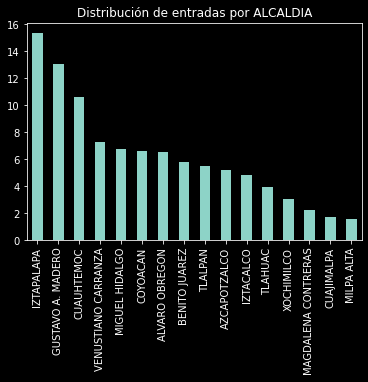

In [9]:
with plt.style.context('dark_background'):
    (pd.value_counts(data["ALCALDIA"])/len(data["ALCALDIA"])*100).plot(kind="bar", title="Distribución de entradas por ALCALDIA")

De aquí, dado que todas las entradas son entradas donde se encuentran antenas de conectividad podemos observar que Iztapalaba es la alcaldía con mayor número de antenas instaladas, en cambio MILPA ALTA es la alcaldía que menos antenas posee

# Distribuciones en algunas alcaldías

## Iztapalapa

In [10]:
iztapalapa=data[data["ALCALDIA"]=="IZTAPALAPA"]

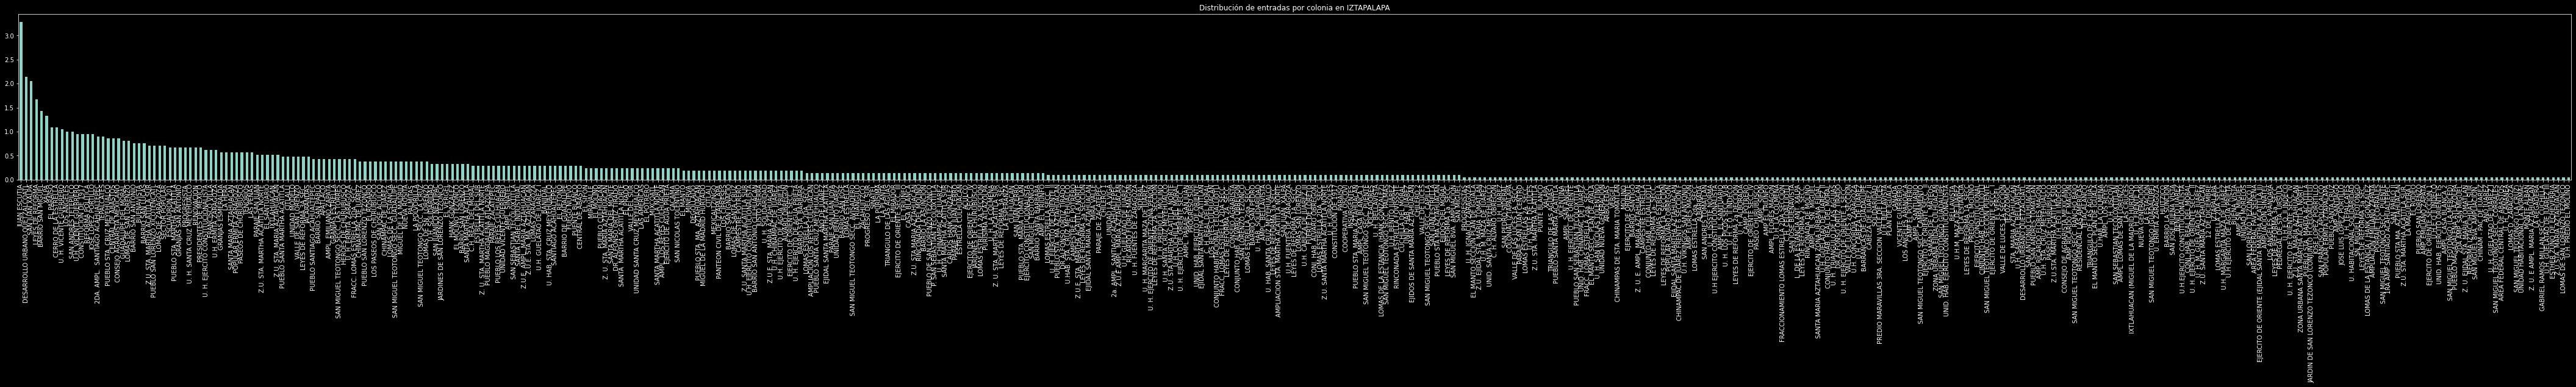

In [11]:
with plt.style.context('dark_background'):
    (pd.value_counts(iztapalapa["COLONIA"])/len(iztapalapa["COLONIA"])*100).plot(kind="bar", title="Distribución de entradas por colonia en IZTAPALAPA",figsize=(75,5))

## CUAHUTEMOC

In [16]:
cuau=data[data["ALCALDIA"]=="CUAUHTEMOC"]


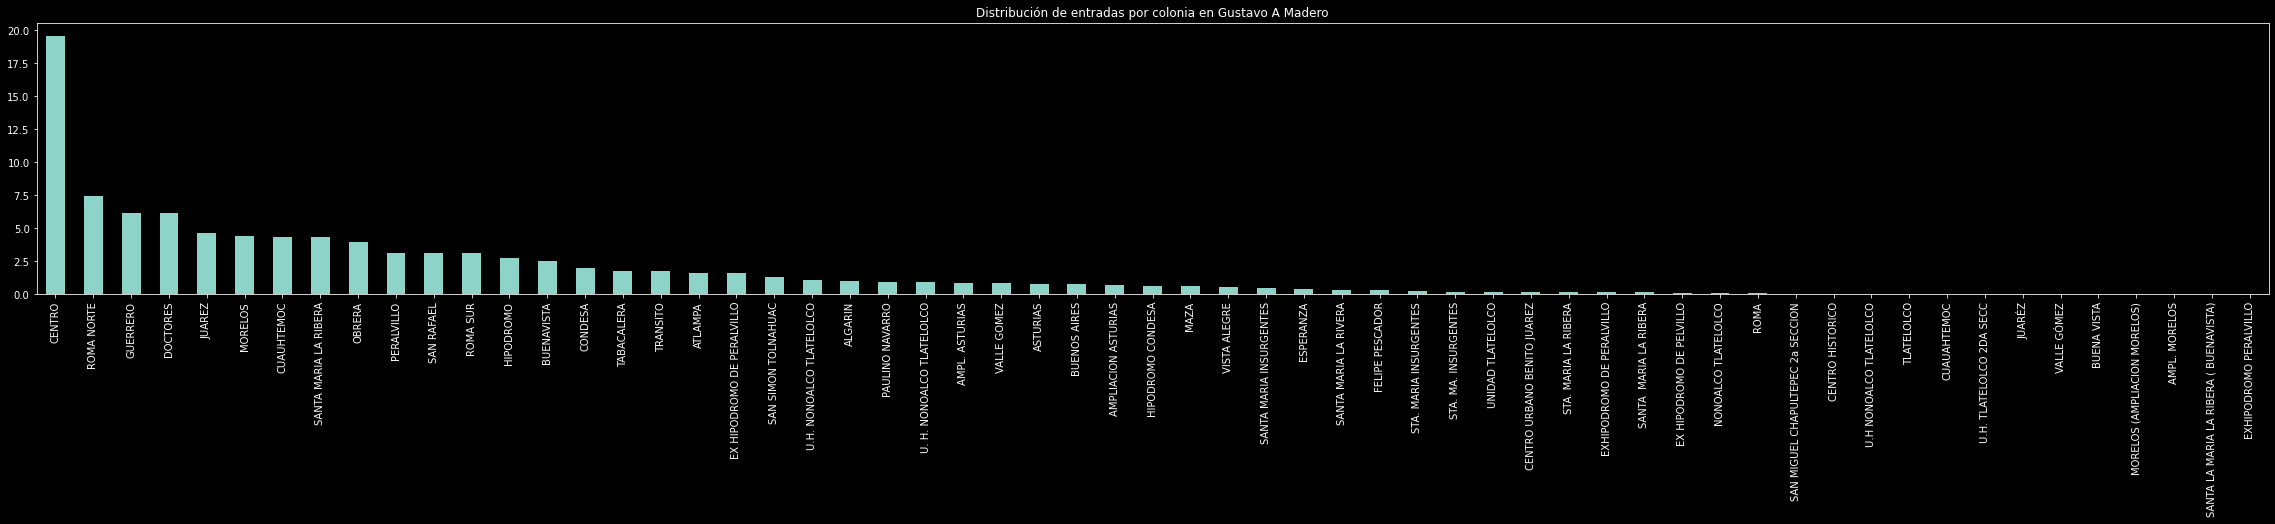

In [17]:
with plt.style.context('dark_background'):
    (pd.value_counts(cuau["COLONIA"])/len(cuau["COLONIA"])*100).plot(kind="bar", title="Distribución de entradas por colonia en Gustavo A Madero",figsize=(40,5))

## Gustavo A Madero

In [18]:
data["ALCALDIA"].unique()

array(['ALVARO OBREGON', 'AZCAPOTZALCO', 'CUAJIMALPA', 'TLALPAN',
       'MAGDALENA CONTRERAS', 'MIGUEL HIDALGO', 'IZTAPALAPA',
       'BENITO JUAREZ', 'COYOACAN', 'MILPA ALTA', 'TLAHUAC', 'XOCHIMILCO',
       'CUAUHTEMOC', 'GUSTAVO A. MADERO', 'VENUSTIANO CARRANZA',
       'IZTACALCO'], dtype=object)

In [19]:
gam=data[data["ALCALDIA"]=="GUSTAVO A. MADERO"]

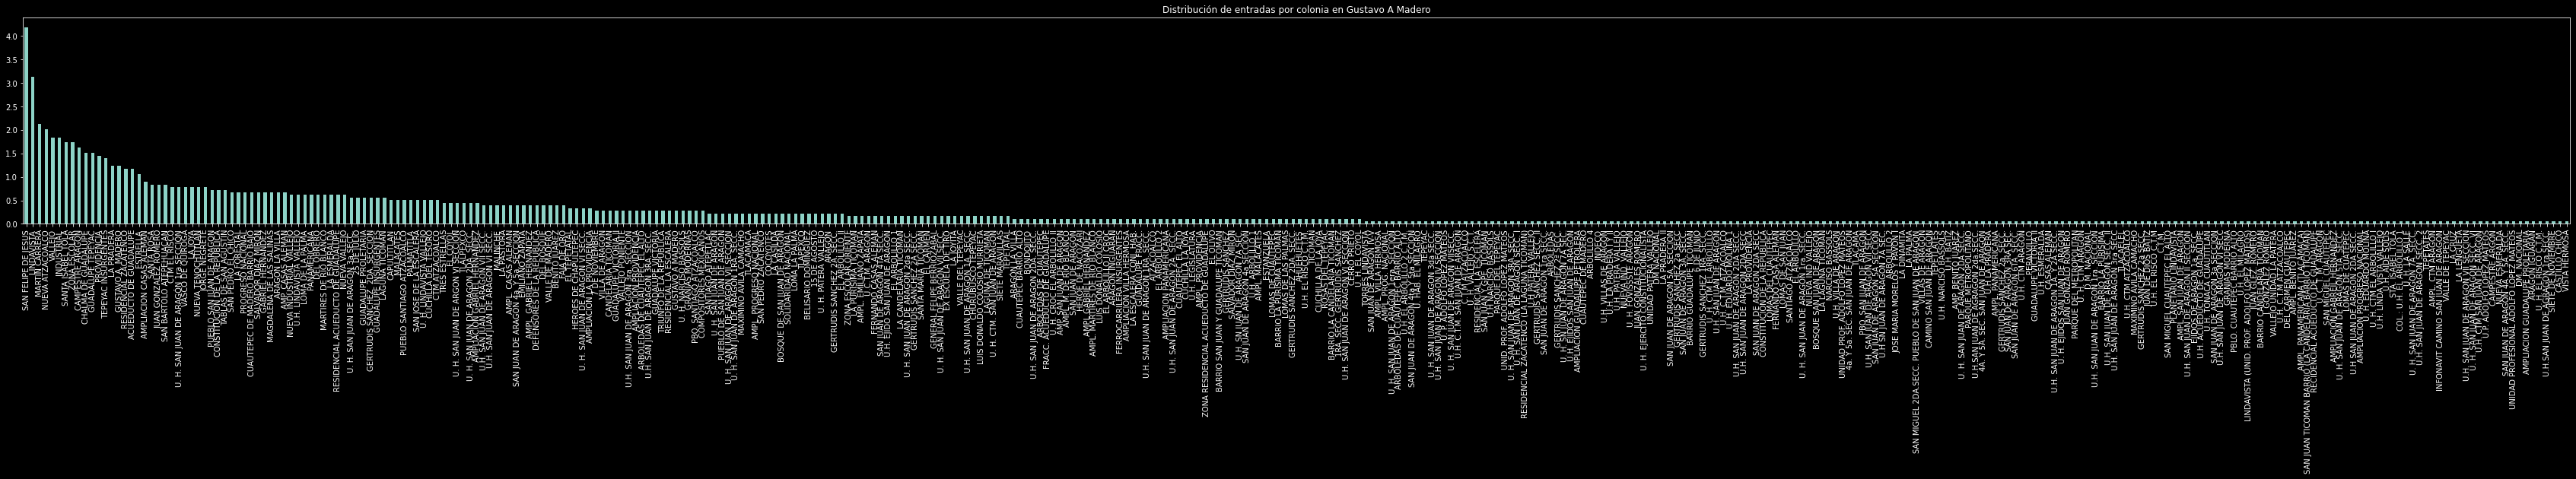

In [21]:
with plt.style.context('dark_background'):
    (pd.value_counts(gam["COLONIA"])/len(gam["COLONIA"])*100).plot(kind="bar", title="Distribución de entradas por colonia en Gustavo A Madero",figsize=(60,5))

## ALVARO OBREGON

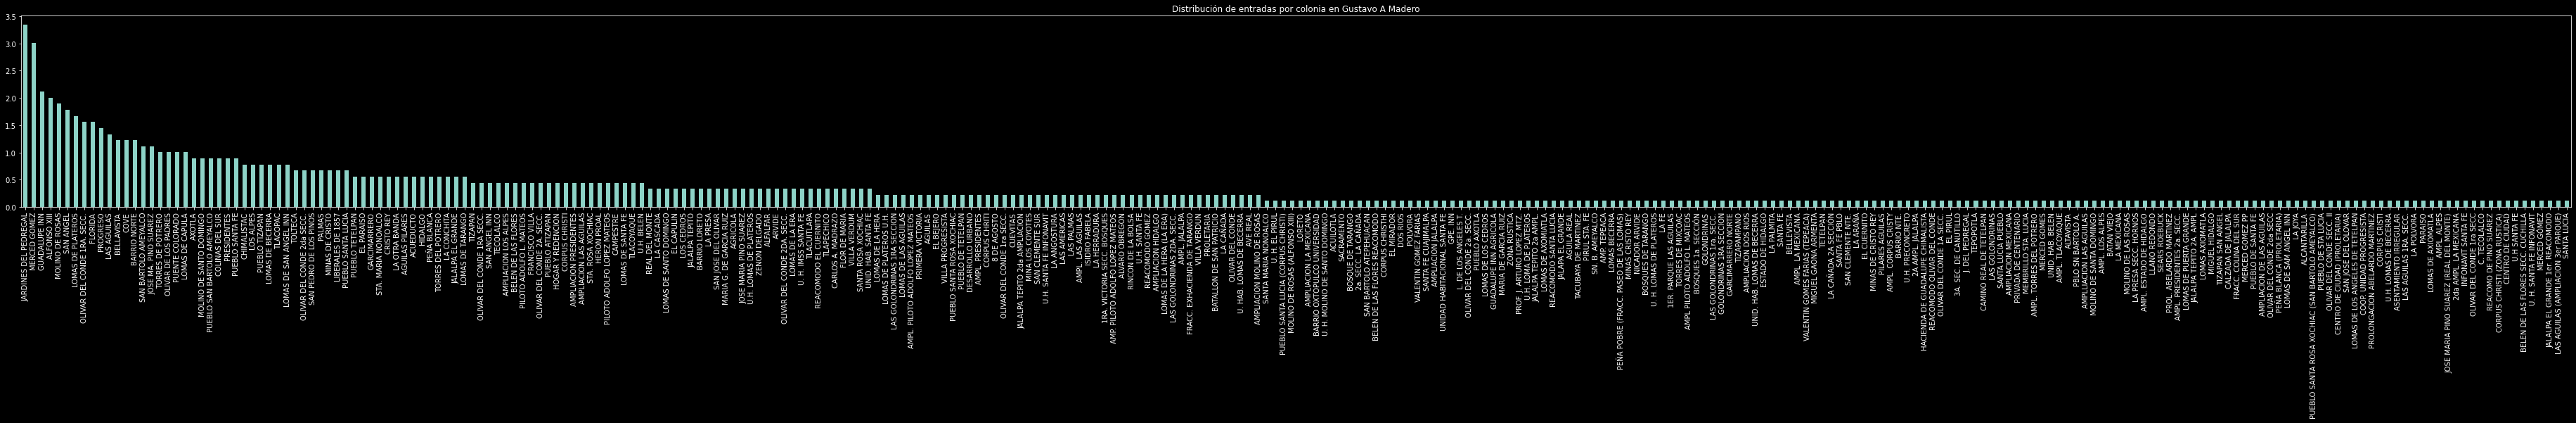

In [23]:
ao=data[data["ALCALDIA"]=="ALVARO OBREGON"]
with plt.style.context('dark_background'):
    (pd.value_counts(ao["COLONIA"])/len(ao["COLONIA"])*100).plot(kind="bar", title="Distribución de entradas por colonia en Gustavo A Madero",figsize=(65,5))

# 